In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
new_model = tf.keras.models.load_model('best_model_coba2.h5')


TRAINING_FILE = 'C:\\Users\\__VivoBook__\\Downloads/Good-Bad-Bean-1/train/_annotations.csv'
VALIDATION_FILE = 'C:\\Users\\__VivoBook__\\Downloads/Good-Bad-Bean-1/valid/_annotations.csv'
TEST_FILE = 'C:\\Users\\__VivoBook__\\Downloads/Good-Bad-Bean-1/test/_annotations.csv'

def parse_data_from_input(filename):
    dataframe = pd.read_csv(filename)
    label_mapping = {'good bean': 0, 'bad bean': 1}
    dataframe['class'] = dataframe['class'].map(label_mapping)

    images = []
    labels = []

    for _, row in dataframe.iterrows():
        image_filename = row['filename']
        image_path = os.path.join(os.path.dirname(filename), image_filename)
        image = cv2.imread(image_path)
        image = cv2.blur(image, (5, 5), 0)

        x_min = row['xmin']
        y_min = row['ymin']
        x_max = row['xmax']
        y_max = row['ymax']

        cropped_image = image[y_min:y_max, x_min:x_max]
        resized_image = cv2.resize(cropped_image, (64, 64))
        reshaped_image = np.expand_dims(resized_image, axis=0)
        images.append(reshaped_image)
        labels.append(row['class'])

    images = np.concatenate(images, axis=0)
    labels = np.array(labels)

    unique_labels = np.unique(labels)
    print("Unique labels:", unique_labels)
    print("Sample images:", images[:5])

    return images, labels

training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)
test_images, test_labels = parse_data_from_input(TEST_FILE)

#normalization
training_images = training_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

train_loss, train_acc = new_model.evaluate(training_images, training_labels)
val_loss, val_acc = new_model.evaluate(validation_images, validation_labels)
test_loss, test_acc = new_model.evaluate(test_images, test_labels)
print(f'val_loss: {val_loss}, val_acc: {val_acc}')
print(f'test_loss: {test_loss}, test_acc: {test_acc}')
print(f'train_loss: {train_loss}, train_acc: {train_acc}')

Unique labels: [0 1]
Sample images: [[[[219 207 195]
   [216 205 193]
   [205 196 183]
   ...
   [205 196 186]
   [199 190 180]
   [199 190 180]]

  [[217 205 193]
   [218 207 194]
   [216 207 194]
   ...
   [198 189 179]
   [199 191 181]
   [205 196 186]]

  [[204 194 181]
   [211 201 188]
   [217 206 194]
   ...
   [203 193 183]
   [198 189 179]
   [201 194 184]]

  ...

  [[193 187 176]
   [184 178 168]
   [175 167 157]
   ...
   [171 175 172]
   [166 170 165]
   [173 175 169]]

  [[181 173 163]
   [168 159 149]
   [177 167 158]
   ...
   [153 162 158]
   [159 167 163]
   [172 177 169]]

  [[169 160 150]
   [178 169 159]
   [185 176 166]
   ...
   [144 152 152]
   [143 151 149]
   [163 170 166]]]


 [[[234 232 224]
   [233 231 223]
   [233 231 223]
   ...
   [232 229 224]
   [235 232 227]
   [235 232 227]]

  [[234 232 224]
   [233 231 223]
   [233 231 223]
   ...
   [230 227 222]
   [232 229 224]
   [232 229 224]]

  [[232 230 222]
   [233 231 223]
   [232 230 222]
   ...
   [228 2

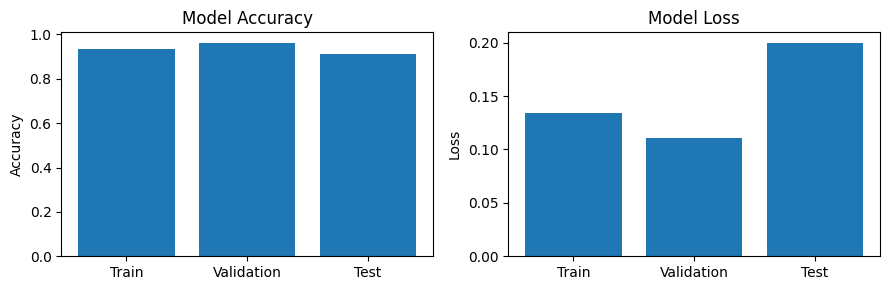

In [4]:
import matplotlib.pyplot as plt

# Accuracy comparison
plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.bar(['Train', 'Validation', 'Test'], [train_acc, val_acc, test_acc])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

# Loss comparison
plt.subplot(122)
plt.bar(['Train', 'Validation', 'Test'], [train_loss, val_loss, test_loss])
plt.title('Model Loss')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


1/1 [==============================] - 1s 858ms/step
C:/Users/__VivoBook__/Downloads/test/bean1.jpeg is good bean.


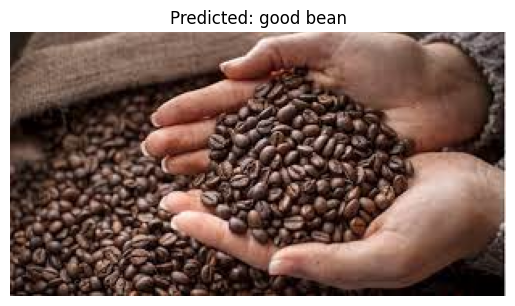

1/1 [==============================] - 0s 159ms/step
C:/Users/__VivoBook__/Downloads/test/bean2.jpeg is good bean.


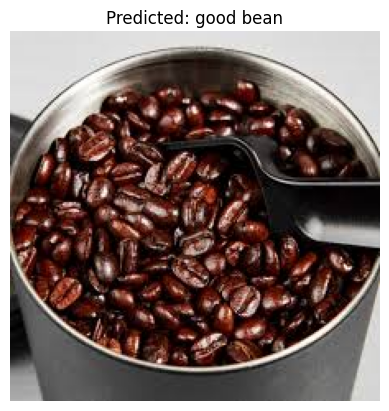

1/1 [==============================] - 0s 131ms/step
C:/Users/__VivoBook__/Downloads/test/bean3.jpeg is good bean.


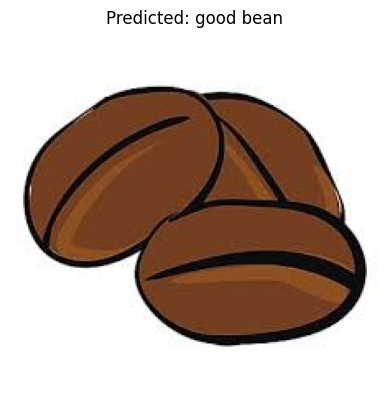

1/1 [==============================] - 0s 148ms/step
C:/Users/__VivoBook__/Downloads/test/bean4.jpeg is good bean.


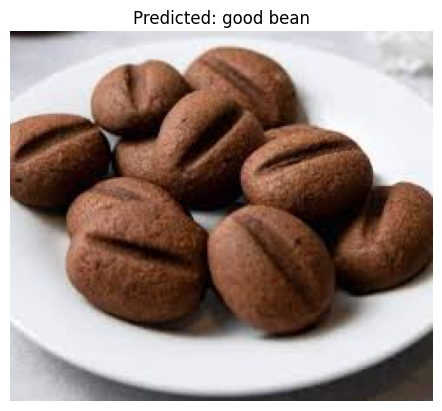

1/1 [==============================] - 0s 202ms/step
C:/Users/__VivoBook__/Downloads/test/bean5.jpeg is bad bean.


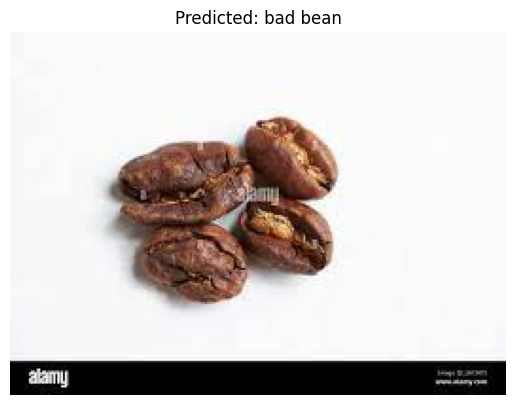

1/1 [==============================] - 0s 107ms/step
C:/Users/__VivoBook__/Downloads/test/bean6.jpeg is bad bean.


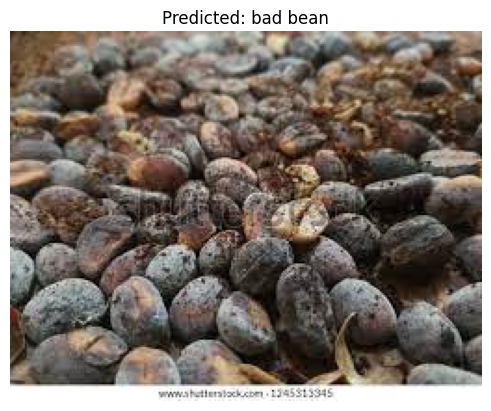

1/1 [==============================] - 0s 112ms/step
C:/Users/__VivoBook__/Downloads/test/bean7.jpeg is bad bean.


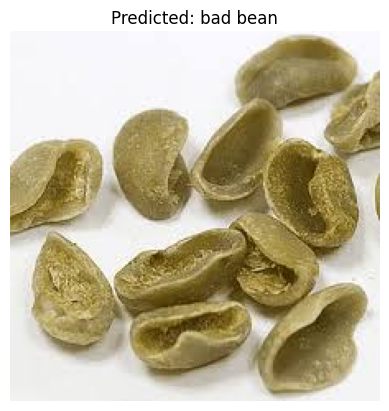

In [17]:
import numpy as np
import os
from tkinter import Tk, filedialog
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

# Assuming you have already loaded and compiled your model

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    return img

# Open a file dialog to select multiple image files
Tk().withdraw()  # Hide the Tkinter main window
image_paths = filedialog.askopenfilenames(title="Select Images")

for image_path in image_paths:
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Make predictions
    predictions = new_model.predict(preprocessed_image)
    predicted_label = int(round(predictions[0][0]))

    # Print the predicted label
    print(f"{image_path} is {'bad' if predicted_label == 0 else 'good'} bean.")

    # Load and display the image
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {'bad' if predicted_label == 0 else 'good'} bean")
    plt.axis('off')
    plt.show()


In [15]:
import cv2
import numpy as np

img_path = 'test/bean8.jpeg'
img = cv2.imread(img_path)
img = cv2.resize(img, (64, 64))
img = np.expand_dims(img, axis=0)
img = img / 255.0
predictions = new_model.predict(img)
label = 'Good Bean' if predictions[0][0] > 0.8 else 'Bad Bean'
print(predictions)
print(label)


1/1 [==============================] - 0s 41ms/step
[[0.27197158 0.72802836]]
Bad Bean
